<a href="https://colab.research.google.com/github/pranavteja/TSF_GRIP_Tasks/blob/main/GRIP_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRANAV TEJA - DATA SCIENCE AND BUSINESS ANALYTICS | GRIP @ THE SPARKS FOUNDATION

TASK 2 | PREDICTION USING UNSUPERVISED ML


IMPORTING THE PREREQUISITE LIBRARIES

In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [89]:
#iris = datasets.load_iris()
#iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
#iris_df.head()
#Alternative procedure below
iris = pd.read_csv('Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


EXPLORATORY DATA ANALYSIS

In [90]:
iris.drop(labels='Id',axis=1,inplace=True)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [91]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [92]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Our Dataset has no null values and we can analyze this dataset now

Checking for Outliers

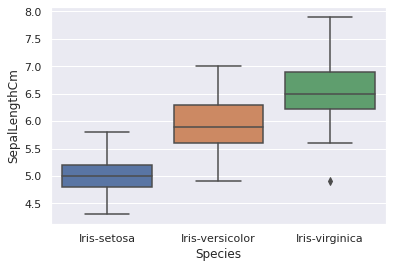

In [93]:
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)

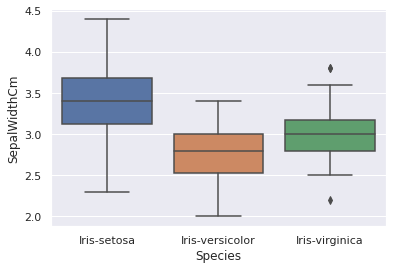

In [94]:
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)

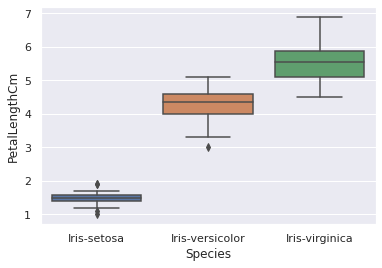

In [95]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

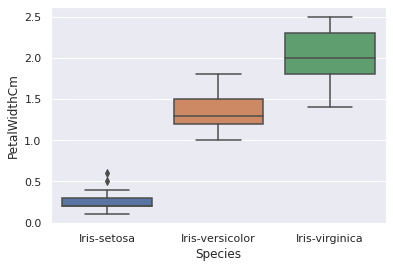

In [96]:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

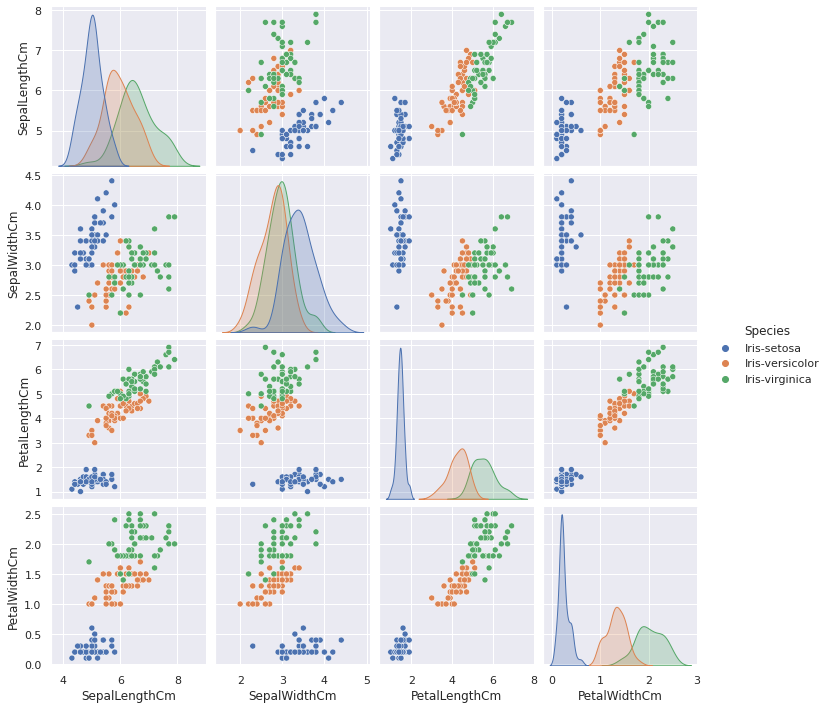

In [97]:
sns.pairplot(iris, hue ='Species')

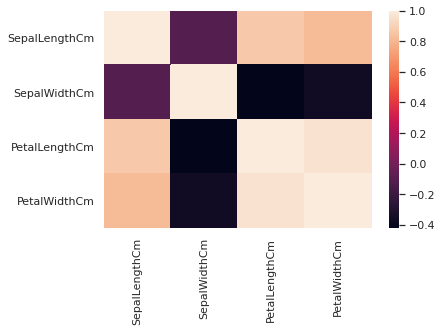

In [98]:
sns.heatmap(iris.corr())

*We observe the following from the heatmap above:*
*Petal Length and Petal Width are strongly correlated*  *to each other.*
*Sepal Length and Sepal Width are not correlated*

APPLYING THE K - MEANS CLUSTERING ALGORITHM

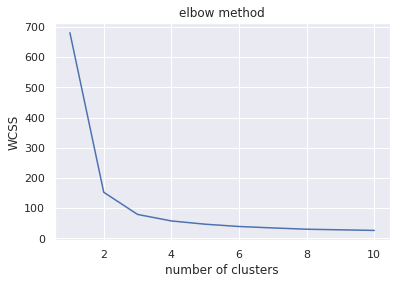

In [99]:
# Finding the number of clusters for kmeans classification

X = iris.iloc[: , [0,1,2,3]].values
wcss = []
for i in range(1 , 11):
    kmeans = KMeans(n_clusters = i , init= 'k-means++' ,
                   max_iter=300,
                   n_init=10,
                   random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
# plot the results of the line graph
plt.plot(range(1,11) , wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()
sns.set(rc={'figure.figsize' : (5,5)})

The optimum number of clusters is where the elbow occurs. Hence, in the above graph, the optimum number of clusters is 3.This is the point where the 'within cluster sum of squares (WCSS)' doesn't decrease significantly with every iteration.

In [100]:
# Applying kmeans to the dataset , creating the kmeans classifer

kmeans = KMeans(n_clusters=3 , init="k-means++",
               max_iter=300,
               n_init=10,
               random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Now let us plot the clusters to visualize them.

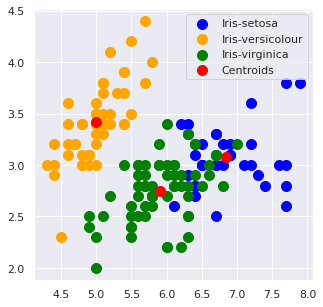

In [101]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

sns.set(rc={'figure.figsize':(15,15)})

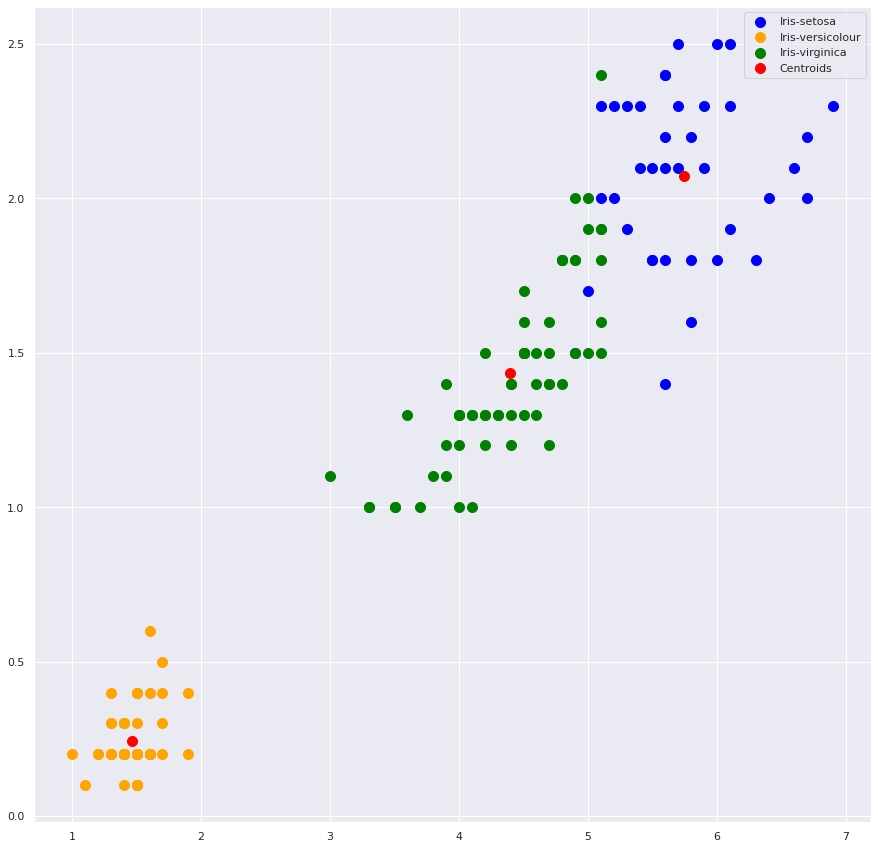

In [103]:
# Visualising the clusters - On the third and fourth columns
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

sns.set(rc={'figure.figsize':(5,5)})